In [3]:
# pyplot_surfaceplot.jl
#
#	Surface Plot demonstration
#
# Daniel Høegh (https://gist.github.com/dhoegh)
# Julia 1.1.0
# 09.12.2014
# Last Edit: 10.05.19

# Reference: https://groups.google.com/d/msg/julia-users/eVtZdp3htTM/TJOt3exCxKgJ

using PyPlot
using Distributions
using LinearAlgebra
ioff() # Interactive plotting OFF, necessary for inline plotting in IJulia
using3D() # Needed to create a 3D subplot

###################
##  Create Data  ##
###################
n = 100
x = range(-3,stop=3,length=n)
y = range(-3,stop=3,length=n)

xgrid = repeat(x',n,1)
ygrid = repeat(y,1,n)

z = zeros(n,n)

for i in 1:n
    for j in 1:n
        z[i:i,j:j] .= pdf(MvNormal(Matrix(1.0I,2,2)),[x[i];y[j]])
    end
end

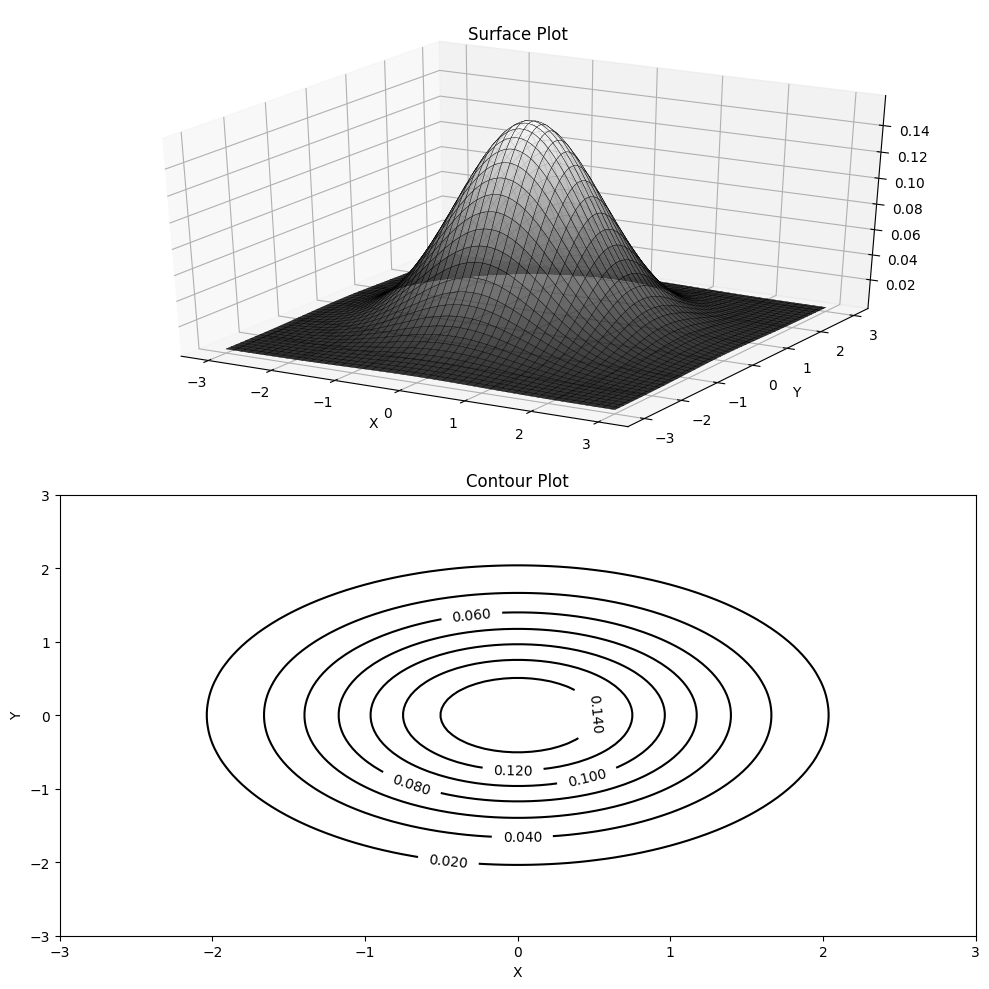

In [2]:
############
##  Plot  ##
############
fig = figure("pyplot_surfaceplot",figsize=(10,10))
ax = fig.add_subplot(2,1,1,projection="3d")
plot_surface(xgrid, ygrid, z, rstride=2,edgecolors="k", cstride=2, cmap=ColorMap("gray"), alpha=0.8, linewidth=0.25)
xlabel("X")
ylabel("Y")
PyPlot.title("Surface Plot")

subplot(212)
ax = fig.add_subplot(2,1,2)
cp = contour(xgrid, ygrid, z, colors="black", linewidth=2.0)
ax.clabel(cp, inline=1, fontsize=10)
xlabel("X")
ylabel("Y")
PyPlot.title("Contour Plot")
tight_layout()
gcf() # Needed for IJulia to plot inline